In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR202010770/Lab05/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import math

## 05. HoughLine 활용하기

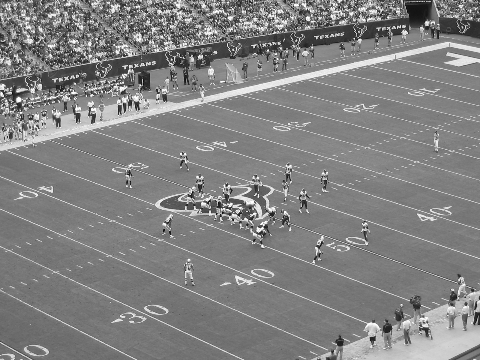

In [ ]:
# 1. img GRAYSCALE로 변환
img = cv2.imread('image/football.jpg')
img = cv2.resize(img, (0,0), fx=0.3, fy=0.3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_img)

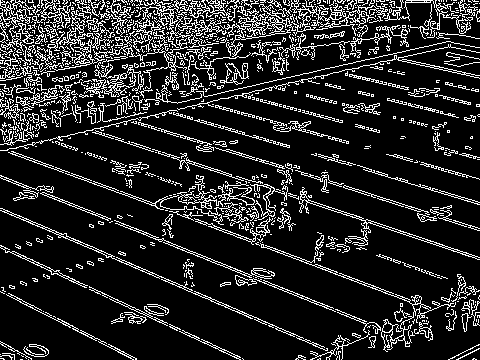

In [ ]:
# 2. 캐니 엣지 검출을 사용하여 엣지 영상 검출
canny = cv2.Canny(gray_img, 100, 300)

cv2_imshow(canny)

In [ ]:
def ROI_selection(img, corners):
  mask = np.zeros_like(img)
  cv2.fillPoly(mask, corners, (255))
  return cv2.bitwise_and(img, mask)

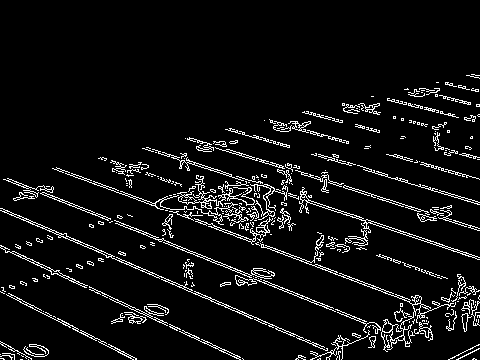

In [ ]:
# 3. 관심 영역(ROI; Region Of Interest)을 설정하여 배경 영역 제외
height, width = gray_img.shape[:2]
corners = np.array([[(0, height//2),
                      (0, height),
                      (width , height),
                      (width , height//5)]])


maskimg = ROI_selection(canny, corners)

cv2_imshow(maskimg)

[[[163.          1.9547688]]

 [[161.          1.9547688]]

 [[222.          2.0071287]]

 [[135.          1.9373155]]

 [[224.          2.0071287]]

 [[140.          1.9198622]]

 [[193.          1.9722221]]

 [[ 90.          1.9024088]]

 [[ 96.          1.8849555]]

 [[ 78.          1.8675023]]

 [[166.          1.9373155]]

 [[133.          1.9373155]]

 [[191.          1.9722221]]

 [[188.          1.9896753]]

 [[168.          1.9373155]]

 [[ 62.          1.850049 ]]

 [[117.          1.9024088]]

 [[ 76.          1.8675023]]

 [[157.          1.9722221]]

 [[ 72.          1.8849555]]

 [[ 55.          1.8675023]]

 [[ 88.          1.9024088]]

 [[138.          1.9198622]]

 [[242.          1.2915436]]

 [[198.          1.3089969]]

 [[164.          1.9373155]]

 [[219.          2.024582 ]]

 [[109.          1.9198622]]

 [[277.          1.2740903]]

 [[111.          1.9198622]]

 [[193.          1.3264502]]

 [[195.          1.3264502]]

 [[159.          1.9722221]]

 [[171.   

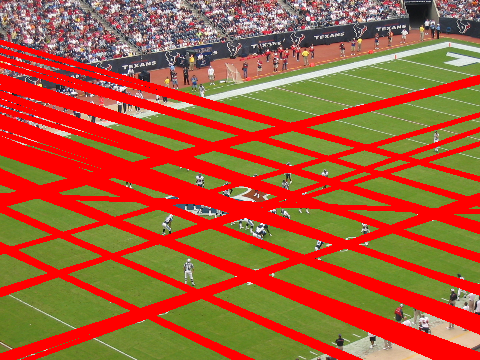

In [ ]:
# 4. 허프 변환을 사용하여 조건을 만족하는 직선 검출

# rho: hough space 에서 로 값을 한번에 얼마나 증가 시킬지
# theta: (단위는 라디안) 마찬가지로 hough space에서 theta 값을 얼마나 증가 시킬지
# threshold: 교차점 몇개가 있을 때 직선으로 판별할지
lines = cv2.HoughLines(maskimg, rho=1, theta=np.pi/180, threshold=100)
print(lines)

result = np.copy(img)
# Draw the lines
for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a * rho
  y0 = b * rho
  pt1 = (int(x0 + 10000 * (-b)), int(y0 + 10000 * a))
  pt2 = (int(x0 - 10000 * (-b)), int(y0 - 10000 * a))
  cv2.line(result, pt1, pt2, (0, 0, 255), 3)

cv2_imshow(result)

[[[ 59 200 411 342]]

 [[  0 245 242 358]]

 [[ 34 188 410 340]]

 [[167 210 372 288]]

 [[242 312 342 355]]

 [[365 220 479 257]]

 [[195 293 342 358]]

 [[155 202 433 309]]

 [[  0 247 240 359]]

 [[227 149 364 191]]

 [[  0 208 242 311]]

 [[257 184 468 256]]

 [[ 81 176 208 224]]

 [[185 138 371 195]]

 [[169 195 291 230]]

 [[146 147 388 226]]

 [[364 169 479 204]]

 [[102 157 227 200]]

 [[124 167 292 225]]

 [[363 169 477 204]]

 [[288 168 446 216]]

 [[  1 292 132 359]]

 [[  0 291 133 359]]

 [[175 194 291 229]]

 [[180 192 291 228]]

 [[  4 179 110 222]]

 [[  5 291 136 358]]

 [[186 192 290 226]]

 [[320 180 429 214]]

 [[298 359 428 309]]

 [[  0 210 158 277]]

 [[  4 291 135 358]]

 [[189 190 290 225]]

 [[298 355 457 297]]

 [[168 208 291 255]]

 [[264 280 377 325]]

 [[229 233 375 289]]]


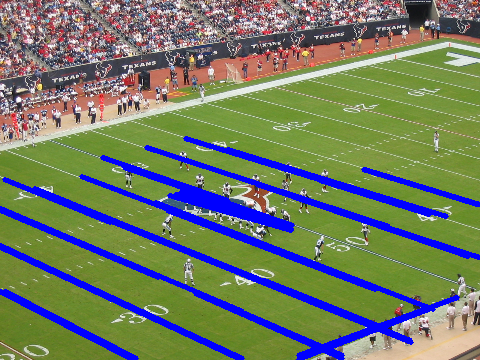

In [ ]:
# minLineLength: 최소 선 길이, 너무 짧은 선을 검출하지 않을 경우
# maxLineGap: 선 위의 점들 사이 최대 거리, 해당 값 보다 클 경우 다른 선으로 간주함
linesp = cv2.HoughLinesP(maskimg, rho=1, theta=np.pi/180, threshold=30,
                        minLineLength=100, maxLineGap=10)
print(linesp)

result = np.copy(img)
# Draw the lines
for line in linesp:
  x1, y1, x2, y2 = line[0]
  cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

## Thinning Algorithm

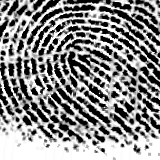

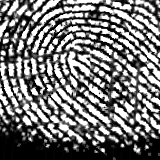

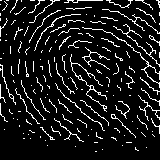

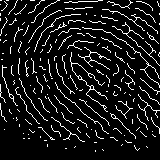

In [ ]:
'''
E-campus 참고
'''